Relax Inc. makes productivity and project management software that's popular with both individuals and teams.Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load Data

In [2]:
users_data=pd.read_csv(r'C:\Users\hxion\Jupyter notebook of Springboard\1481069814_relax_challenge\relax_challenge\takehome_users.csv',encoding='latin-1')

In [3]:
users_data

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


# Data Wrangling

In [4]:
users_data['last_session_creation_time'] = pd.to_datetime(users_data.last_session_creation_time, unit='s')
users_data['creation_time'] = pd.to_datetime(users_data.creation_time)

In [5]:
users_data.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [6]:

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


There is missing data in 'last_session_creation_time ', according its meaning, I assume they are users who have not logged in since they signed up so I will fill these missing values with the signup timestamp. For the missing 'invited_by_user_id' info, I will fill these with 0, because there is no user_id of zero, so a zero in this column will be a stand-in for 'not invited by another user'.

In [7]:
users_data['last_session_creation_time']= users_data['last_session_creation_time'].fillna(users_data['creation_time'])
users_data['invited_by_user_id'] = users_data['invited_by_user_id'].fillna(0)

In [8]:
users_data['invited_by_user_id'] = users_data['invited_by_user_id'].astype('int64')

In [9]:
users_data.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240


In [10]:
eng_data=pd.read_csv(r'C:\Users\hxion\Jupyter notebook of Springboard\1481069814_relax_challenge\relax_challenge\takehome_user_engagement.csv')

In [11]:
eng_data.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [12]:
eng_data['time_stamp'] = pd.to_datetime(eng_data['time_stamp'], infer_datetime_format=True)

C:\Users\hxion\AppData\Local\Temp\ipykernel_3240\831260812.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  eng_data['time_stamp'] = pd.to_datetime(eng_data['time_stamp'], infer_datetime_format=True)


In [13]:
eng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


eng_data appears to be a clean dataset,no missing values, no duplicates.

We need to create a feature to define whether or not a users has adopted:users who have logged in at least 3 separate days in at least one seven day period.

In [14]:
def get_logins(grouping, frequency):
    return grouping.rolling(frequency, on = 'time_stamp')['user_id'].count()

eng_data['7_day_logins'] = eng_data.groupby('user_id', as_index=False, group_keys=False).apply(get_logins, '7D')

In [15]:
adopted = []

for i in eng_data.index:
    if eng_data['7_day_logins'][i] >= 3:
        if eng_data['user_id'][i] not in adopted:
            adopted.append(eng_data['user_id'][i])

In [16]:
len(adopted)

1602

In [17]:
adopted_users = []

for i in users_data['object_id']:
    if i in adopted:
        adopted_users.append(1)
    else:
        adopted_users.append(0)

In [18]:
users_data['adopted'] = adopted_users
users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [19]:
users_data['adopted'].value_counts()

adopted
0    10398
1     1602
Name: count, dtype: int64

In [20]:
print(f'Adopted users make up {1602/12000*100:.2f}% of users.')

Adopted users make up 13.35% of users.


Drop columns no need for modeling:

In [21]:
users_data = users_data.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time',
                    'org_id', 'invited_by_user_id'], axis=1)

In [22]:
users_data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted
0,GUEST_INVITE,1,0,0
1,ORG_INVITE,0,0,1
2,ORG_INVITE,0,0,0
3,GUEST_INVITE,0,0,0
4,GUEST_INVITE,0,0,0


In [23]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             12000 non-null  object
 1   opted_in_to_mailing_list    12000 non-null  int64 
 2   enabled_for_marketing_drip  12000 non-null  int64 
 3   adopted                     12000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 375.1+ KB


# Preprocessing

In [24]:
# Use the 'get_dummies' function from pandas to perform one-hot encoding
categorical_features = users_data.select_dtypes(include=['object'])
users_data= pd.concat([users_data.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)
users_data = users_data.astype(int)

In [25]:
users_data

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0
11996,0,0,0,0,0,0,0,1
11997,1,1,0,1,0,0,0,0
11998,0,0,0,0,0,1,0,0


# Train-Test Split

In [26]:
X =users_data.drop(columns=['adopted'])
y =users_data.adopted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666,stratify=y)

# Modeling

## Random Forest

In this case, I choose random forest model,as it works well in most of cases.

In [27]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
report = classification_report(y_test, y_pred)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60      2080
           1       0.15      0.62      0.24       320

    accuracy                           0.48      2400
   macro avg       0.52      0.54      0.42      2400
weighted avg       0.79      0.48      0.55      2400



Not very good....

## Logistic Regression

In [31]:
logreg_model = LogisticRegression(class_weight="balanced",random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [32]:
y_pred2 = logreg_model.predict(X_test)

In [33]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60      2080
           1       0.15      0.63      0.24       320

    accuracy                           0.47      2400
   macro avg       0.52      0.54      0.42      2400
weighted avg       0.79      0.47      0.55      2400



The results are similar, and both are not very satisfactory.

In [34]:
y_pred_prob_model1 = rf_model.predict_proba(X_test)[:, 1]
y_pred_prob_model2 = logreg_model.predict_proba(X_test)[:, 1]

In [35]:
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred_prob_model1)
fpr_model2, tpr_model2, _ = roc_curve(y_test, y_pred_prob_model2)

In [36]:
roc_auc_model1 = auc(fpr_model1, tpr_model1)
roc_auc_model2 = auc(fpr_model2, tpr_model2)

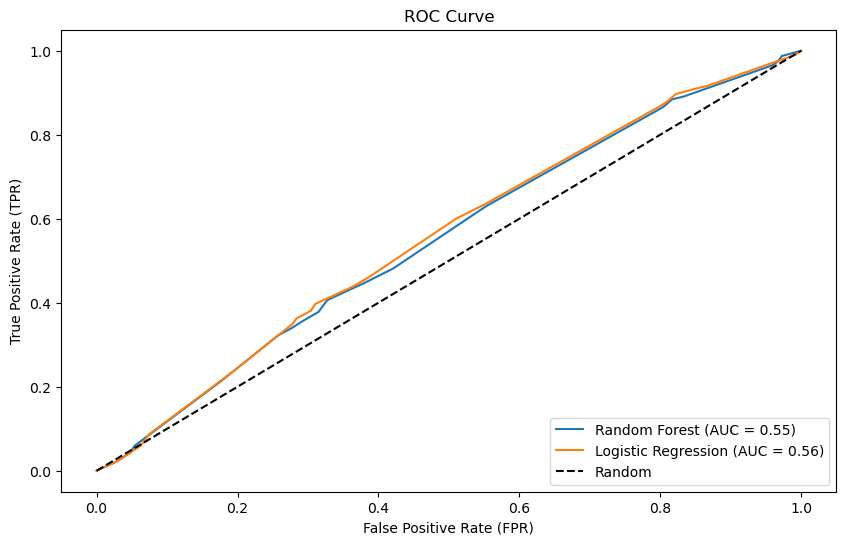

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(fpr_model1, tpr_model1, label='Random Forest (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_model2))
# and so on for other models

# Plot the random classifier (chance line)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()


Logistic Regression is slightly better.

# Feature Importance

In [40]:
coefficients = np.exp(logreg_model.coef_[0])
feature_names = logreg_model.feature_names_in_
pd.DataFrame(coefficients, feature_names, columns=['coefficients']).sort_values(by='coefficients', ascending=False)

,coefficients
creation_source_GUEST_INVITE,1.329501
creation_source_SIGNUP_GOOGLE_AUTH,1.272155
opted_in_to_mailing_list,1.144973
creation_source_SIGNUP,1.062805
creation_source_ORG_INVITE,0.989519
enabled_for_marketing_drip,0.923164
creation_source_PERSONAL_PROJECTS,0.545415
